In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Loading Datasets

iris = datasets.load_iris()

In [21]:
#load the dataset

X = iris.data[:, :2]
y= iris.target

In [24]:
#create dataframe

# Create dataframe for visualization
df = pd.DataFrame(data=X, columns=iris.feature_names[:2])
df['Target'] = y

In [25]:
df.head()

,sepal length (cm),sepal width (cm),Target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [26]:
df.tail()

,sepal length (cm),sepal width (cm),Target
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2
149,5.9,3.0,2


In [27]:
#split the dataset
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [28]:

knn =  KNeighborsClassifier(n_neighbors = 5)

In [29]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [30]:
y_pred = knn.predict(X_test)

In [31]:
y_pred 

array([2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 1, 1, 2, 1, 2, 0,
       2, 0, 1, 1, 2, 0, 1, 2])

In [32]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8333333333333334

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.57      0.67      0.62         6
           2       0.83      0.77      0.80        13

    accuracy                           0.83        30
   macro avg       0.80      0.81      0.81        30
weighted avg       0.84      0.83      0.84        30



In [34]:
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix


array([[11,  0,  0],
       [ 0,  4,  2],
       [ 0,  3, 10]], dtype=int64)

C:\Users\suyash\AppData\Local\Temp/ipykernel_5640/3133958993.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


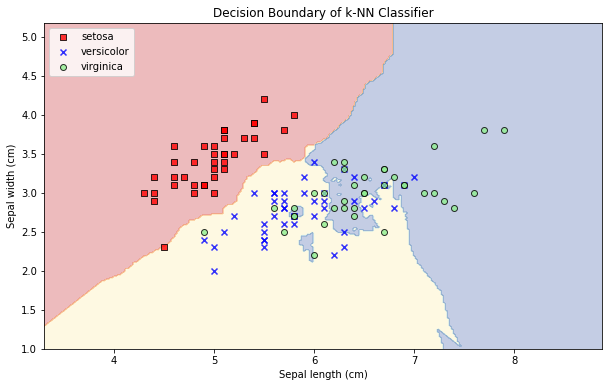

In [35]:
# Function to plot decision boundary
def plot_decision_boundary(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = plt.cm.RdYlBu
    
      # Determine plot limits
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    # Predict the class for each point in the grid
    Z = classifier.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)
    
        # Plot the decision boundary
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=iris.target_names[cl],
                    edgecolor='black')

# Plot decision boundary
plt.figure(figsize=(10, 6))
plot_decision_boundary(X_train, y_train, classifier=knn)
plt.title('Decision Boundary of k-NN Classifier')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend(loc='upper left')
plt.show()


C:\Users\suyash\AppData\Local\Temp/ipykernel_5640/3133958993.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


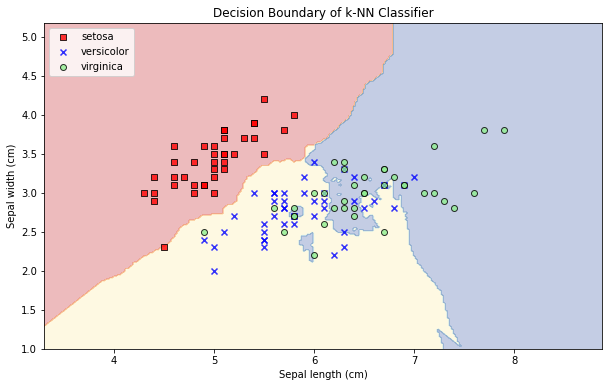

In [36]:
# Create k-NN classifier
n_neighbors = 5
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

# Fit the classifier
knn.fit(X_train, y_train)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plot_decision_boundary(X_train, y_train, classifier=knn)
plt.title('Decision Boundary of k-NN Classifier')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend(loc='upper left')
plt.show()
